# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [33]:
# set up lists to hold reponse info
city1=[]
lat= []
lng=[]
temp_max=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
j=0

print("Beginning Data Retrieval")
print("------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    if (response["cod"]==200):
        print(f"Processing Record:{j}|{city}")
        j=j+1
        city1.append(city)
        cloudiness.append(response['clouds']['all'])
        country.append(response["sys"]['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])        
        wind_speed.append(response['wind']['speed'])        
    else:
        print(f"City not found. Skipping...")
        


Beginning Data Retrieval
------------------------
Processing Record:0|el vigia
Processing Record:1|hilo
Processing Record:2|forestville
Processing Record:3|khatanga
Processing Record:4|okhotsk
Processing Record:5|ilulissat
Processing Record:6|upernavik
Processing Record:7|puerto ayora
Processing Record:8|san patricio
Processing Record:9|la joya
Processing Record:10|sao filipe
Processing Record:11|comodoro rivadavia
Processing Record:12|barrow
Processing Record:13|bluff
Processing Record:14|airai
Processing Record:15|komsomolskiy
Processing Record:16|tiksi
Processing Record:17|sao felix do xingu
Processing Record:18|vilhena
Processing Record:19|narsaq
City not found. Skipping...
Processing Record:20|isangel
Processing Record:21|qaqortoq
Processing Record:22|rikitea
Processing Record:23|arlit
Processing Record:24|albany
Processing Record:25|punta alta
Processing Record:26|nanortalik
Processing Record:27|saldanha
City not found. Skipping...
Processing Record:28|chapais
Processing Record:2

Processing Record:245|killybegs
City not found. Skipping...
Processing Record:246|codrington
Processing Record:247|mayo
City not found. Skipping...
Processing Record:248|faya
Processing Record:249|praia
Processing Record:250|ficarazzi
Processing Record:251|whitehorse
Processing Record:252|nantucket
Processing Record:253|ixtapa
City not found. Skipping...
Processing Record:254|anadyr
Processing Record:255|bulolo
Processing Record:256|banamba
Processing Record:257|obo
Processing Record:258|shaunavon
Processing Record:259|mount gambier
City not found. Skipping...
Processing Record:260|dawei
Processing Record:261|cheremukhovo
Processing Record:262|la ronge
Processing Record:263|kijang
Processing Record:264|emba
Processing Record:265|petatlan
Processing Record:266|honiara
Processing Record:267|vista hermosa
Processing Record:268|saint-philippe
Processing Record:269|ginda
Processing Record:270|bhatkal
Processing Record:271|kahului
Processing Record:272|tura
Processing Record:273|pandan
City 

Processing Record:479|makinsk
Processing Record:480|manado
City not found. Skipping...
Processing Record:481|taree
City not found. Skipping...
Processing Record:482|umm kaddadah
Processing Record:483|prince rupert
Processing Record:484|wodonga
Processing Record:485|dakar
Processing Record:486|ust-kuyga
Processing Record:487|ouadda
Processing Record:488|grajau
Processing Record:489|mana
Processing Record:490|gomel
City not found. Skipping...
Processing Record:491|pulandian
Processing Record:492|springdale
Processing Record:493|kautokeino
Processing Record:494|januaria
Processing Record:495|severnyy
Processing Record:496|chuncheng
City not found. Skipping...
Processing Record:497|nichinan
Processing Record:498|yulara
Processing Record:499|yeppoon
Processing Record:500|trelew
Processing Record:501|kuandian
Processing Record:502|carauari
City not found. Skipping...
Processing Record:503|chabahar
City not found. Skipping...
Processing Record:504|port arthur
Processing Record:505|dunedin
Pro

In [34]:
weather_dict = {
    "City": city1,
    "Cloudiness":cloudiness,
    "Country":country,
     "Date":date,
    "Humidity": humidity,
    "lat": lat,
    "lng":lng,
    "Maximum Temperature": temp_max,
    "Wind Speed":wind_speed,
    
   
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,lat,lng,Maximum Temperature,Wind Speed
0,el vigia,65,VE,1592706237,73,8.62,-71.65,25.18,1.66
1,hilo,90,US,1592706238,65,19.73,-155.09,26.00,6.70
2,forestville,1,US,1592706238,100,38.85,-76.88,22.78,1.50
3,khatanga,57,RU,1592706238,44,71.97,102.50,19.89,5.60
4,okhotsk,85,RU,1592706238,80,59.38,143.30,10.54,1.82


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
#weather_data.to_csv("../output_data/cities.csv", index=True)
weather_data.count()

City                   535
Cloudiness             535
Country                535
Date                   535
Humidity               535
lat                    535
lng                    535
Maximum Temperature    535
Wind Speed             535
dtype: int64

In [36]:
weather_data=pd.DataFrame(weather_data)
weather_data

,City,Cloudiness,Country,Date,Humidity,lat,lng,Maximum Temperature,Wind Speed
0,el vigia,65,VE,1592706237,73,8.62,-71.65,25.18,1.66
1,hilo,90,US,1592706238,65,19.73,-155.09,26.00,6.70
2,forestville,1,US,1592706238,100,38.85,-76.88,22.78,1.50
3,khatanga,57,RU,1592706238,44,71.97,102.50,19.89,5.60
4,okhotsk,85,RU,1592706238,80,59.38,143.30,10.54,1.82
...,...,...,...,...,...,...,...,...,...
530,pitimbu,20,BR,1592706303,94,-7.47,-34.81,23.00,2.10
531,gananoque,0,CA,1592706177,73,44.33,-76.17,22.78,0.45
532,laguna,1,US,1592706304,39,38.42,-121.42,28.89,4.60
533,rahuri,98,IN,1592706304,74,19.38,74.65,25.43,3.75


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
#  Get the indices of cities that have humidity over 100%.
hum_100=weather_data[weather_data.iloc[:,4]==100].index
hum_100

Int64Index([2, 80, 122, 132, 137, 144, 152, 209, 222, 243, 413, 433, 452, 461,
            519],
           dtype='int64')

In [38]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data.drop(hum_100, inplace=False)
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,lat,lng,Maximum Temperature,Wind Speed
0,el vigia,65,VE,1592706237,73,8.62,-71.65,25.18,1.66
1,hilo,90,US,1592706238,65,19.73,-155.09,26.00,6.70
3,khatanga,57,RU,1592706238,44,71.97,102.50,19.89,5.60
4,okhotsk,85,RU,1592706238,80,59.38,143.30,10.54,1.82
5,ilulissat,71,GL,1592706238,49,69.22,-51.10,8.00,3.10


In [39]:
# Extract relevant fields from the data frame
clean_city_data.to_csv("../output_data/cities.csv", index=True)

# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

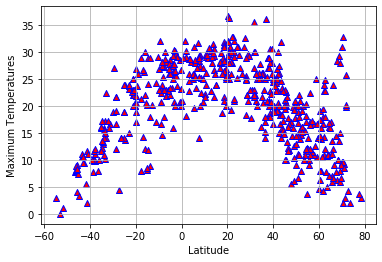

In [40]:
x_values = weather_data.iloc[:,5]
y_values = weather_data.iloc[:,7]
plt.scatter(x_values,y_values,marker='^',color='r',edgecolors='b')
plt.grid(b=None, which='major', axis='both')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperatures')
plt.show()

## Latitude vs. Humidity Plot

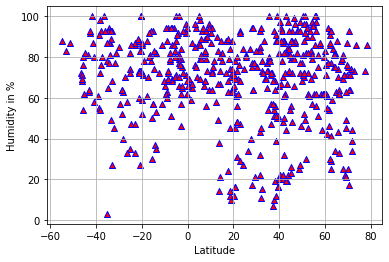

In [41]:
x_values = weather_data.iloc[:,5]
y_values = weather_data.iloc[:,4]
plt.scatter(x_values,y_values,marker='^',color='r',edgecolors='b')
plt.grid(b=None, which='major', axis='both')
plt.xlabel('Latitude')
plt.ylabel('Humidity in %')
plt.show()

## Latitude vs. Cloudiness Plot

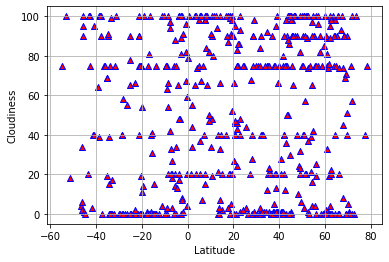

In [42]:
x_values = weather_data.iloc[:,5]
y_values = weather_data.iloc[:,1]
plt.scatter(x_values,y_values,marker='^',color='r',edgecolors='b')
plt.grid(b=None, which='major', axis='both')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

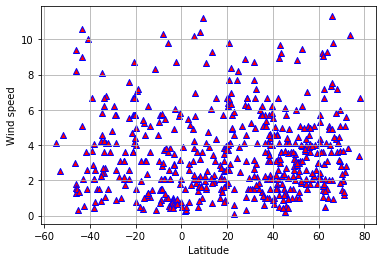

In [43]:
x_values = weather_data.iloc[:,5]
y_values = weather_data.iloc[:,8]
plt.scatter(x_values,y_values,marker='^',color='r',edgecolors='b')
plt.grid(b=None, which='major', axis='both')
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
plt.show()

## Linear Regression

In [44]:
# Create Northern Hemisphere DataFrames
nh_df=clean_city_data[clean_city_data['lat']>0]
nh_df= pd.DataFrame(nh_df)
nh_df

,City,Cloudiness,Country,Date,Humidity,lat,lng,Maximum Temperature,Wind Speed
0,el vigia,65,VE,1592706237,73,8.62,-71.65,25.18,1.66
1,hilo,90,US,1592706238,65,19.73,-155.09,26.00,6.70
3,khatanga,57,RU,1592706238,44,71.97,102.50,19.89,5.60
4,okhotsk,85,RU,1592706238,80,59.38,143.30,10.54,1.82
5,ilulissat,71,GL,1592706238,49,69.22,-51.10,8.00,3.10
...,...,...,...,...,...,...,...,...,...
527,matiguas,94,NI,1592706303,90,12.84,-85.46,22.71,2.14
531,gananoque,0,CA,1592706177,73,44.33,-76.17,22.78,0.45
532,laguna,1,US,1592706304,39,38.42,-121.42,28.89,4.60
533,rahuri,98,IN,1592706304,74,19.38,74.65,25.43,3.75


In [45]:
# Create Southern Hemisphere DataFrames
sh_df=clean_city_data[clean_city_data['lat']<0]
sh_df= pd.DataFrame(sh_df)
sh_df

,City,Cloudiness,Country,Date,Humidity,lat,lng,Maximum Temperature,Wind Speed
7,puerto ayora,82,EC,1592706238,96,-0.74,-90.35,20.56,1.79
11,comodoro rivadavia,100,AR,1592706192,54,-45.87,-67.50,9.00,8.20
13,bluff,4,NZ,1592706239,72,-46.60,168.33,7.85,2.97
14,airai,0,TL,1592706123,63,-8.93,125.41,20.85,2.05
17,sao felix do xingu,27,BR,1592706146,86,-6.64,-51.99,21.96,1.00
...,...,...,...,...,...,...,...,...,...
521,payakumbuh,4,ID,1592706302,68,-0.22,100.63,26.63,0.75
525,terra santa,91,BR,1592706303,93,-2.10,-56.49,23.73,0.67
528,keetmanshoop,55,NA,1592706303,33,-26.58,18.13,14.00,1.00
529,tual,88,ID,1592706303,80,-5.67,132.75,26.92,9.80


In [46]:
# OPTIONAL: Create a function to create Linear Regression plots
#working with scatter plus line
def plot_df(df, col, name):
    x2_value=df["lat"]
    y2_value=df[col]
    plt.scatter(x2_value, y2_value)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x2_value, y2_value)
    r=rvalue*rvalue
    print(f" The square of R in {i} {r}")
    line_plot = slope * x2_value +intercept
    plt.plot(x2_value,line_plot, "r--")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(min( x2_value),min(y2_value)),fontsize=13,color="red")
    plt.grid(b=None, which='major', axis='both')
    plt.xlabel('Latitude')
    plt.ylabel(i)
    plt.title(f'Latitude vs. {i} {name}')
    plt.savefig(f"../Images/{i}{name}.png")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The square of R in Maximum Temperature 0.48324910555166745


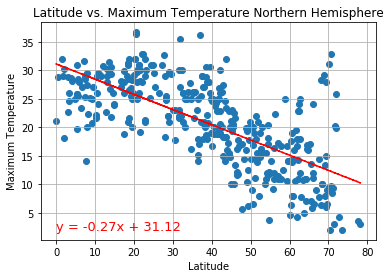

 The square of R in Maximum Temperature 0.6140149325038428


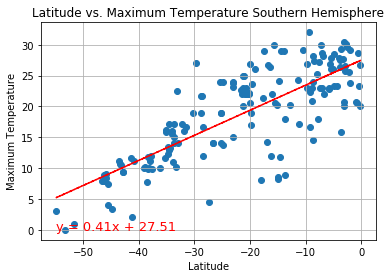

 The square of R in Humidity 0.003356808825042743


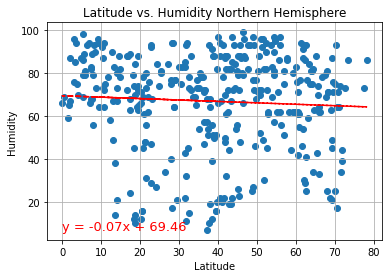

 The square of R in Humidity 0.0006707363413002847


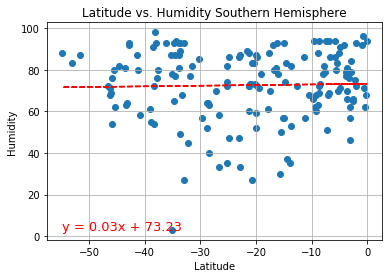

 The square of R in Wind Speed 0.003080194887076722


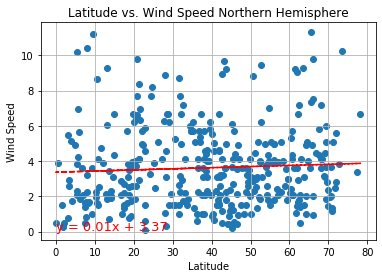

 The square of R in Wind Speed 0.02005448593077822


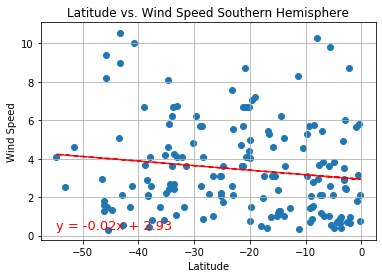

 The square of R in Cloudiness 0.005947939839913828


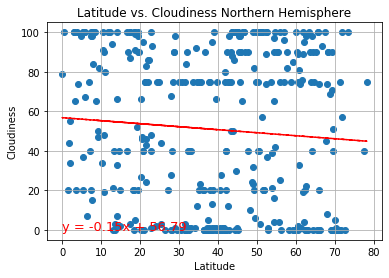

 The square of R in Cloudiness 0.001107360523782282


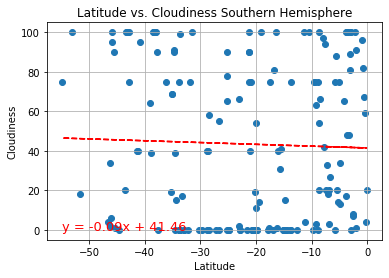

In [47]:
parameters=["Maximum Temperature","Humidity","Wind Speed",'Cloudiness']
name1="Northern Hemisphere"
name2="Southern Hemisphere"
for i in parameters:
    plot_df(nh_df, i, name1)
    plot_df(sh_df, i, name2)
    
    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression